<a href="https://colab.research.google.com/github/cristinapopescu19/Projects/blob/AI/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notiuni preliminare

#### Functii recursive

Oricand aveti de definit o functie recursiva, ganditi-va la:

- relatia recursiva cu apelul recurent
- conditie de oprire!
- parametrii apelului initial

In [ ]:
# Suma numerelor pana la x:

def f(x):
  if x <= 0:    # Contitie de oprire
    return 0
  else:
    return f(x-1) + x   # Relatie cu apelul recurent

In [ ]:
f(10)  # Parametrii apelului initial

55

In [ ]:
# Maximul dintr-o lista

def maxim(l, i):
  if i>=len(l)-1:    # Conditia de oprire
    return l[len(l)-1]
  maxim_restul = maxim(l, i+1)  # Relatia cu apelul recurent
  if maxim_restul > l[i]:
    return maxim_restul
  else:
    return l[i]

In [ ]:
maxim([1, 2, 7, 3, 4], 0)   # Parametrii apelului initial (functia va merge recursiv prin fiecare pozitie in ordine crescatoare, pornesc de la pozitia 0)

7

Input, programe interactive

In [ ]:
input("Scrieti ceva in casuta")

Scrieti ceva in casutaceva


'ceva'

In [ ]:
x = input("Dati o valoare lui x ")
print(int(x))

Dati o valoare lui x12
12


In [ ]:
x = 0
while(int(x) < 10):
  x = input("Scrieti o valoare mai mare decat 10 ")


Scrieti o valoare mai mare decat 10 4
Scrieti o valoare mai mare decat 10 7
Scrieti o valoare mai mare decat 10 11


## Algoritmul MiniMax

Algoritm construire arbore de cautare

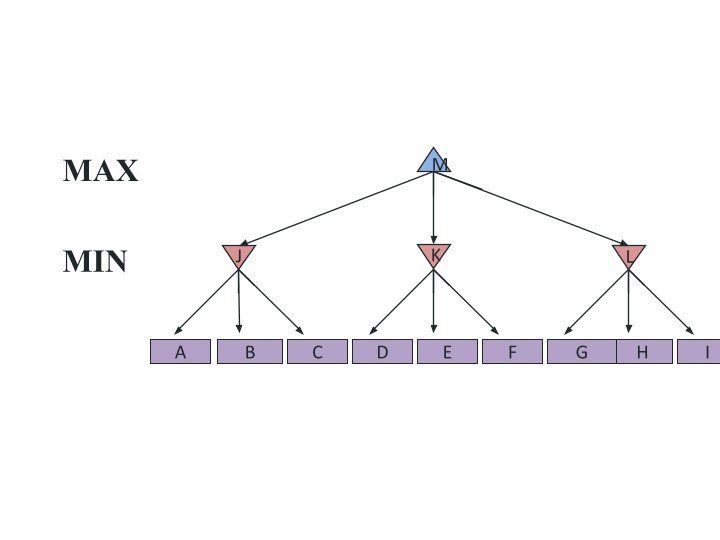

In [ ]:
arbore_parinti = {
    'A': 'J',
    'B': 'J',
    'C': 'J',
    'D':'K',
    'E':'K',
    'F':'K',
    'G':'L',
    'H':'L',
    'I':'L',
    'J':'M',
    'K':'M',
    'L':'M',
    }

Completati dictionarul de mai sus pentru a reprezenta structura arborelui.

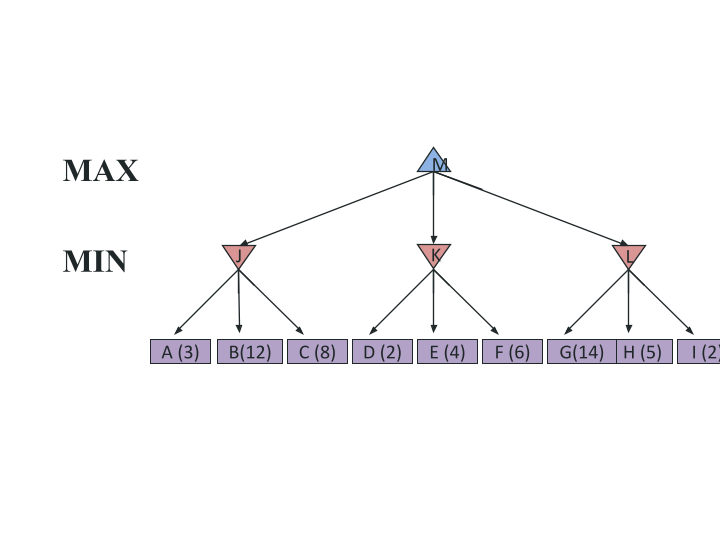

In [ ]:
frunze = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
arbore_costuri = {
    'A': 3,
    'B': 12,
    'C': 8,
    'D': 2,
    'E': 4,
    'F': 6,
    'G': 14,
    'H':5,
    'I':2,
}

Completati arborele de mai sus cu costurile frunzelor.

Algoritm alfa-beta pruning (data viitoare)

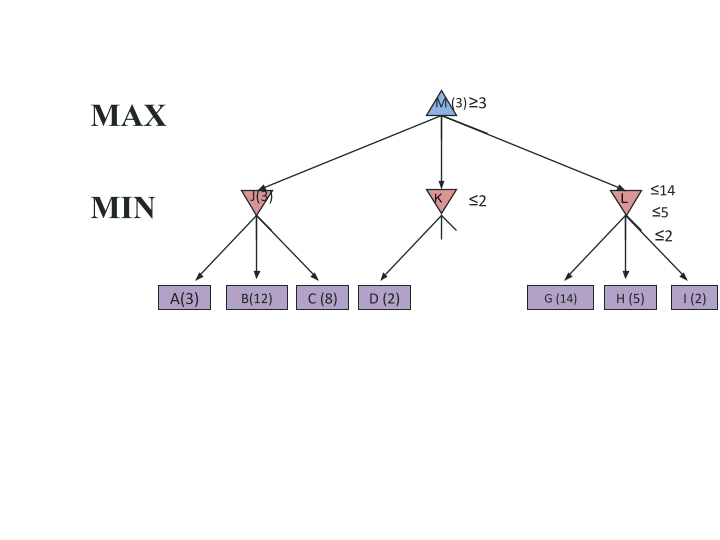

    def max-value(stare, α, β):
      initializeaza v = -∞
      pentru fiecare succesor al stării:
        v = max(v, value(successor, α, β))
        if v ≥ β return v
        α = max(α, v)
      return v


    def min-value(stare , α, β):
      initializeaza v = +∞
      pentru fiecare succesor al stării:
        v = min(v, value(successor, α, β))
        if v ≤ α return v
        β = min(β, v)
      return v


# Exercitii (1p)

Definiti o functie recursiva care calculeaza elementul n din sirul Fibonacci.

Sirul Fibonacci: 1 2 3 5 8 13 ...

In [ ]:
def fib(n):
    if n<1:
        return None
    elif n==1 or n == 2:
        return n
    else:
        s = fib(n-1)+fib(n-2)
        if s!=0:
           return s

fib(5)

8

Definiti o functie care primeste ca argument un arbore ca dictionar de parinti si returneaza o reprezentare a arborelui ca dictionar de fii.

In [ ]:
# Exemplu:

arbore_parinti = {
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 3,
    7: 3,
    1: None
}

arbore_fii = {
    1: [2, 3],
    2: [4, 5],
    3: [6, 7],
}

def convert_arbore_fii(arbore_parinti):
    arbore_fii = {}
    for nod in arbore_parinti:
        parinte = arbore_parinti[nod]
        if parinte in arbore_fii:
           arbore_fii[parinte].append(nod)
           print("am adaugat nodul", nod)
        else:
          print("am adaugat nodul", nod)
          arbore_fii[parinte]=[nod]
    return arbore_fii

In [ ]:
convert_arbore_fii(arbore_parinti)

am adaugat nodul 2
am adaugat nodul 3
am adaugat nodul 4
am adaugat nodul 5
am adaugat nodul 6
am adaugat nodul 7
am adaugat nodul 1


{1: [2, 3], 2: [4, 5], 3: [6, 7], None: [1]}

Definiti o functie care primeste ca argument un arbore ca dictionar de parinti, si radacina, cat si tipul radacinii / jucatorul corespunzator primei mutari ("MIN", sau "MAX"), si adauga pentru fiecare nod o valoare de tip string care marcheaza nivelurile alternative ca "MIN" sau "MAX".

Hint: va puteti folosi de reprezentarea ca arbore de fii, folosind functia de mai sus.


In [ ]:
# Exemplu

arbore_parinti = {
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 3,
    7: 3,
    1: None
}

radacina = 1
tip_radacina = 'max'

def adauga_etichete_minmax(arbore, radacina, tip_radacina):
    etichete = {}
    eticheta_radacina = 'max' if tip_radacina == 'max' else 'min'
    etichete[radacina] = {'parinte': None, 'eticheta': eticheta_radacina}
    coada = [radacina]
    while coada:
        nod = coada.pop(0)
        eticheta_nod = etichete[nod]['eticheta']
        for fiu in arbore:
            if arbore[fiu] == nod and fiu not in etichete:
                eticheta_fiu = 'min' if eticheta_nod == 'max' else 'max'
                etichete[fiu] = {'parinte': nod, 'eticheta': eticheta_fiu}
                coada.append(fiu)
    return etichete
etichete = adauga_etichete_minmax(arbore_parinti, radacina, tip_radacina)
for nod, eticheta in etichete.items():
    print(nod, eticheta['parinte'], eticheta['eticheta'])

1 None max
2 1 min
3 1 min
4 2 max
5 2 max
6 3 max
7 3 max


Definiti o functie recursiva care primeste ca arument un arbore definit ca dictionar de fii, si returneaza adancimea maxima a arborelui.

Hint: adancime(arbore, nod) = adancime(arbore, fiu_nod) + 1, daca nodul are fii (altfel nu se adauga 1 si se opreste recursivitatea). Observatie: aceasta functie va executa practic o cautare in adancime (DFS) modificata (plus calculul adancimii).

In [ ]:
def adancime_rec(arbore_fii, nod):
    if nod not in arbore_fii:
        return 0
    else:
        adancime_max_fii = 0
        for fiu in arbore_fii[nod]:
            adancime_fiu = adancime_rec(arbore_fii, fiu)
            adancime_max_fii = max(adancime_max_fii, adancime_fiu)
        return adancime_max_fii + 1

In [ ]:
radacina = 1
# Pentru a apela functia pe un arbore dat, trebuie apelata ca
adancime_rec(arbore_fii, radacina)

2

Calculati adancimea maxima a arborelui folosindu-va de o functie recursiva care primeste ca arument un arbore definit ca dictionar de parinti, si returneaza adancimea.

Hint: adancime(arbore, nod) = adancime(arbore, parinte_nod) + 1, daca nodul nu este radacina (altfel nu se adauga 1 si se opreste recursivitatea)

In [ ]:
# Pentru a apela functia avem nevoie sa pornim de la fiecare frunza
# si sa alegem maximul rezultatelor pentru fiecare frunza.
def adancime_rec2(arbore_fii, nod):
    if nod not in arbore_parinti:
        return 0
    parinte = arbore_parinti[nod]
    if parinte is None:  # daca nodul este radacina
        return 0
    return adancime_rec2(arbore_parinti, parinte) + 1

frunze = [4, 5, 6, 7]
for f in frunze:
  adancime_max = 0
  adancime = adancime_rec2(arbore_fii, f)
  if adancime > adancime_max:
    adancime_max = adancime
print("Adancimea maxima gasita:", adancime_max)

Adancimea maxima gasita: 2


### MiniMax

Definiti o functie recursiva care primeste ca argument un arbore definit prin doua dictionare: dictionar de parinti plus dictionar de costuri, unde doar frunzele au costurile completate, si completati dictionarul de costuri astfel incat sa calculeze costuri pentru toate nodurile din arbore, conform algoritmului MiniMax, si returneaza arborele de costuri completat. Se presupune ca toate frunzele au acelasi nivel, si ca primul jucator (radacina) este "max".


Hints:

In [ ]:
# Reprezentarea valorii infinit
import numpy as np
print("Infinit:", np.inf)
print("Infinit comparatie", 100000000 > np.inf)
print("Minus infinit:", -np.inf)
print("Minus infinit comparatie", -100000000 < np.inf)


Infinit: inf
Infinit comparatie False
Minus infinit: -inf
Minus infinit comparatie True


In [ ]:
# Functie predefinita pentru maximul/minimul dintre o serie de valori
print(max(1,2,3))
print(max([1,2,3]))
print(min(13,-np.inf))

3
3
-inf


In [ ]:

arbore_parinti = {
'A': None,
'B': 'A',
'C': 'A',
'D': 'A',
'E': 'B',
'F': 'B',
'G': 'D',
'H': 'D',
'I': 'G'
}
arbore_costuri = {
    'A': 3,
    'B': 12,
    'C': 8,
    'D': 2,
    'E': 4,
    'F': 6,
    'G': 14,
    'H':5,
    'I':2,
}
def minimax(arbore_parinti, arbore_costuri, player_radacina):
    def calculeaza_minimax(nod, player): #Funcția recursivă pentru calcularea valorilor MiniMax pentru fiecare nod
        if nod in frunze:
            return arbore_costuri[nod]
        elif player == player_radacina: # Dacă jucătorul este cel pentru care se calculează max, se calculează max dintre toți fii nodului curent
            valoare_maxima = -np.inf
            for fiu in arbore_parinti:
                if arbore_parinti[fiu] == nod:
                    valoare_fiu = calculeaza_minimax(fiu, player=False)
                    valoare_maxima = max(valoare_maxima, valoare_fiu)
            return valoare_maxima
        else: # Altfel, se calculează min dintre toți fii nodului curent
            valoare_minima = np.inf
            for fiu in arbore_parinti:
                if arbore_parinti[fiu] == nod:
                    valoare_fiu = calculeaza_minimax(fiu, player=True)
                    valoare_minima = min(valoare_minima, valoare_fiu)
            return valoare_minima
    frunze = [nod for nod in arbore_parinti if not arbore_parinti[nod]]
    for nod in arbore_parinti:
        arbore_costuri[nod] = calculeaza_minimax(nod, player=True)
    return arbore_costuri


Evaluati (apelati) functia pe arborele corespunzator desenului de mai sus.

In [ ]:
minimax(arbore_parinti, arbore_costuri, "max")

{'A': 3,
 'B': inf,
 'C': inf,
 'D': inf,
 'E': inf,
 'F': inf,
 'G': inf,
 'H': inf,
 'I': inf}